# SENTIMENT ANALYSIS OF SKIN CARE PRODUCTS

<img src="Skincare1400.webp" alt="Responsive Image" style="width:100%; height:auto;">

### Name of the Group: EYAI CYNDIKET
### Members
#### 1. Lionel Ajeliti
#### 2. Kavata Musyoka
#### 3. Tabby Mirara
#### 4. Amos Kipkoech
#### 5. Stanley Macharia


## PROJECT SUMMARY

This project uses Natural Language Processing (NLP) techniques to evaluate user-generated skincare product reviews, with the objective of identifying relevant sentiment patterns across distinct customer groups.  The dataset comprises hundreds of evaluations, each providing subjective input on product efficacy, which is frequently linked to particular skin features such as tone and type.

 The primary goal is to extract sentiment (positive, negative, or neutral) from free-text reviews and detect patterns associated with certain product features, skin types, and brands.  The approach includes text preprocessing, tokenization, sentiment labeling, and model training with text classification-appropriate machine learning methods.  Advanced visualizations and analysis are utilized to understand how sentiments change amongst demographic or skin-type groupings.

Unlike recommendation systems, which advise things, this NLP research focuses on understanding why certain products are evaluated positively or negatively, providing consumers and companies with deeper, data-driven understandings.  By uncovering sentiment trends in large-scale textual data, our study helps to provide more transparent skincare experiences and data-driven product development.

## BUSINESS PROBLEM

In the beauty and skincare market, user evaluations are a valuable yet underutilized source of consumer information.  These evaluations frequently include comprehensive personal experiences with products, emphasizing their impact on different skin kinds, tones, and conditions.  However, due to the unstructured and subjective nature of this data, companies, researchers, and potential customers find it challenging to properly assess sentiment or establish trends across enormous amounts of input.

 Most analytics now rely on star ratings or keyword mentions, which oversimplify user sentiment and fail to capture complex thoughts like mixed sentiments or conditional satisfaction (for example, "great for dry skin but irritating on sensitive areas").  This lack of granularity may lead to bad product development decisions, unproductive marketing tactics, and inadequate customer service.

This project deals with the demand for more understanding into skincare product evaluations by creating an NLP-powered sentiment analysis system.  By using powerful natural language processing techniques to identify and evaluate user sentiment, the system hopes to derive significant patterns that represent real-world product success across a broad user base.  The study will also look at links between sentiment and variables like skin tone, skin type, and brand, to get a better understanding of how various demographics react to skincare products.

### Objectives
Main Objective: To perform sentiment analysis on customer reviews on products to enhance customer satisfaction.
- To use data visualizations tools to assess product categories and brand popularity to guide companies on future pricing
- To assess price range across various products to improve affordability of products by customers.
- To detect common keywords and phrases to highlight positive, neutral and negative reviews on products to understand customer nsatisfaction and dissatisfaction.
- To build a model that recommends products based on skin type, skin tone and price.

### Stakeholders

The key stakeholders are-
- online stores that sell skin care products;
- companies that produce and sell skin care products; and
- users or customers

## DATA UNDERSTANDING

The data was taken from [kaggle](https://www.kaggle.com/datasets/melissamonfared/sephora-skincare-reviews/data). It contains information about beauty products from sephora online store.

The following are the key features for the dataset:
- rating: The rating given by the author for the product on a scale of 1 to 5
- is_recommended: Indicates if the author recommends the product or not (1-true, 0-false)
- total_feedback_count: Total number of feedback (positive and negative ratings) left by users for the review
- total_neg_feedback_count: The number of users who gave a negative rating for the review
- total_pos_feedback_count: The number of users who gave a positive rating for the review
- review_text: The main text of the review written by the author
- review_title: The title of the review written by the author
- skin_tone: Author's skin tone
- skin_type: Author's skin type


## METRIC OF SUCCESS

#### A. Accuracy & Classification Metrics:
Accuracy: 88%

Measures overall correctness of sentiment predictions (positive, negative, neutral).

Precision: 85%

Reflects how many predicted positive sentiments are actually positive.

Recall: 83%

Measures how well the model identifies all actual positive sentiments.

F1 Score: 0.84

Harmonic mean of precision and recall, giving a single measure of model effectiveness.

#### B. Business & Engagement Metrics:
Sentiment Distribution Consistency: 95%

Checks if the sentiment classification follows expected distribution patterns across brands/products.

Top Brand Recognition Accuracy: 90%

Ensures the most positively reviewed brands align with actual high-performing brands in the dataset.

#### C. Coverage & Robustness:
Category Coverage: 100%

Ensures all product categories (e.g., moisturizers, cleansers, serums) are represented in sentiment classification.

N-gram Sentiment Generalization Score: 78%

Evaluates how well the model captures sentiment from varied linguistic patterns or less common phrasing.

Misclassification Rate on Ambiguous Reviews: < 10%

Assesses robustness by tracking errors in mixed or borderline sentiment texts.

Download libraries relevant for this project

In [1]:
# Data Manipulation & Analysis
import pandas as pd
import numpy as np
from collections import Counter

# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from wordcloud import WordCloud

# Text Pre-processing and Natural Language
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import re
import string
import contractions
import nltk
from nltk.corpus import stopwords

# Modelling and Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')





## 1. DATASET LOADING


We will load all the review datasets, check for null entries, merge them into one dataset and then drop unnecessary columns for Exploratory Data Analysis (EDA).

In [2]:
data1 = pd.read_csv('reviews_0-250_masked.csv')
data1.head(3)

,Unnamed: 0.1,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,0,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,1,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,2,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [3]:
data2 = pd.read_csv('reviews_1250-end_masked.csv')
data2.head(3)

,Unnamed: 0.1,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,416,416,2,0.0,0.125000,8,7,1,2023-02-27,I used it once a day for a month and saw no vi...,I wanted so badly for this to work.,NaN,blue,dry,blonde,P473126,CLINICAL Discoloration Repair Serum,Paula's Choice,52.0
1,417,417,5,1.0,0.857143,14,2,12,2023-02-04,"I got really bad cystic acne, once the acne we...",Every morning and night. Follow with spf!,lightMedium,brown,combination,black,P473126,CLINICAL Discoloration Repair Serum,Paula's Choice,52.0
2,418,418,4,1.0,1.000000,1,0,1,2022-12-05,Really pleased with this serum so far although...,NaN,light,brown,combination,NaN,P473126,CLINICAL Discoloration Repair Serum,Paula's Choice,52.0


In [4]:
data3 = pd.read_csv('reviews_250-500_masked.csv')
data3.head(3)

,Unnamed: 0.1,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,2281,2281,1,0.0,0.75,4,1,3,2023-03-12,"I really wanted to love this mask, but it brok...",Did not work for me.,NaN,brown,combination,NaN,P479841,Floral Recovery Overnight Mask with Squalane,fresh,69.0
1,2282,2282,5,1.0,1.00,1,0,1,2023-03-07,Seen results after just one use! Use as a nigh...,Must have for redness,light,green,combination,red,P479841,Floral Recovery Overnight Mask with Squalane,fresh,69.0
2,2283,2283,5,1.0,NaN,0,0,0,2023-02-20,No matter I use on my face in my night routine...,Emphasis on the calming and complimentary,deep,brown,combination,black,P479841,Floral Recovery Overnight Mask with Squalane,fresh,69.0


In [5]:
data4 = pd.read_csv('reviews_500-750_masked.csv')
data4.head(3)

,Unnamed: 0.1,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,5140,5140,5,1.0,NaN,0,0,0,2023-03-20,"Great texture to soothe skin , no odour, leave...",NaN,light,green,normal,brown,P457008,Cryo Rubber Masks,Dr. Jart+,15.0
1,5141,5141,5,1.0,1.0,4,0,4,2023-03-18,I personally do not like or believe in sheet m...,The only sheet mask with results,light,green,oily,NaN,P457008,Cryo Rubber Masks,Dr. Jart+,15.0
2,5142,5142,5,1.0,1.0,1,0,1,2023-03-17,I love using the vitamin c mask. It’s so well...,My favorite mask of all time!,tan,brown,dry,black,P457008,Cryo Rubber Masks,Dr. Jart+,15.0


In [6]:
data5 = pd.read_csv('reviews_750-1250_masked.csv')
data5.head(3)

,Unnamed: 0.1,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,1125,1125,4,1.0,NaN,0,0,0,2023-03-17,These are really fun for those spa days with f...,Love these,NaN,NaN,dry,NaN,P460856,Clean Eye Mask,SEPHORA COLLECTION,3.5
1,1126,1126,5,1.0,1.0,1,0,1,2023-03-16,I love love love this product. My under eyes a...,immediately bought more,light,blue,combination,brown,P460856,Clean Eye Mask,SEPHORA COLLECTION,3.5
2,1127,1127,5,1.0,NaN,0,0,0,2023-03-15,I tried this product for the first time and lo...,A must try!,NaN,brown,combination,NaN,P460856,Clean Eye Mask,SEPHORA COLLECTION,3.5


Since the above 5 datasets have the same columns, we join them together

In [7]:
data = pd.concat([data1, data2, data3, data4, data5])
data.head(3)


,Unnamed: 0.1,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,0,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,1,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,2,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285412 entries, 0 to 25039
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0.1              285412 non-null  int64  
 1   Unnamed: 0                285412 non-null  int64  
 2   rating                    285412 non-null  int64  
 3   is_recommended            228180 non-null  float64
 4   helpfulness               131090 non-null  float64
 5   total_feedback_count      285412 non-null  int64  
 6   total_neg_feedback_count  285412 non-null  int64  
 7   total_pos_feedback_count  285412 non-null  int64  
 8   submission_time           285412 non-null  object 
 9   review_text               285067 non-null  object 
 10  review_title              205718 non-null  object 
 11  skin_tone                 230186 non-null  object 
 12  eye_color                 217666 non-null  object 
 13  skin_type                 248538 non-null  object 

From the info method, we can see that we have 285412 rows and 19 columns. There's object, integer and float data types. We can also note that we have some missing values in some of the columns.



## 2. DATA CLEANING  

We'll drop the unncessary columns, impute and/ drop missing values

In [9]:
#drop columns that are not needed
data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'helpfulness', 'submission_time'], axis=1, inplace=True)

We'll now check missing values, to determine if we drop or replace them

In [10]:
#check for missing values
data.isna().sum()

rating                          0
is_recommended              57232
total_feedback_count            0
total_neg_feedback_count        0
total_pos_feedback_count        0
review_text                   345
review_title                79694
skin_tone                   55226
eye_color                   67746
skin_type                   36874
hair_color                  71081
product_id                      0
product_name                    0
brand_name                      0
price_usd                       0
dtype: int64

In [11]:
#check the percentages of the missing values
missing_perc = data.isna().sum()/ len(data) * 100
missing_perc

rating                       0.000000
is_recommended              20.052415
total_feedback_count         0.000000
total_neg_feedback_count     0.000000
total_pos_feedback_count     0.000000
review_text                  0.120878
review_title                27.922442
skin_tone                   19.349572
eye_color                   23.736213
skin_type                   12.919569
hair_color                  24.904699
product_id                   0.000000
product_name                 0.000000
brand_name                   0.000000
price_usd                    0.000000
dtype: float64

For `is_recommnded`, we'll fill with the median, `skin_tone`, `eye_color`, `skin_type`, `hair_color`, we'll fill with mode.

In [12]:
#impute missing values
for col in ['is_recommended']:
    data[col] = data[col].fillna(data[col].median())

for col in ['skin_tone', 'eye_color', 'skin_type', 'hair_color']:
    data[col] = data[col].fillna(data[col].mode()[0])

We'll drop missing values in `review_text` and `review_title`

In [13]:
#drop rows with missing values for review text and review title
data.dropna(subset=['review_text', 'review_title'], inplace=True)

Confirm missing values again.

In [14]:
data.isna().sum()


rating                      0
is_recommended              0
total_feedback_count        0
total_neg_feedback_count    0
total_pos_feedback_count    0
review_text                 0
review_title                0
skin_tone                   0
eye_color                   0
skin_type                   0
hair_color                  0
product_id                  0
product_name                0
brand_name                  0
price_usd                   0
dtype: int64

In [15]:
data.shape

(205718, 15)

In [16]:
#create a new column for sentiment
data['Sentiment'] = data['rating'].apply(lambda x: 'Positive' if x> 3 else 'Negative' if x<3 else 'Neutral')


For reviews in `review_text` column, we'll do data cleaning by lowercasing, removing noise, tokenize, remove stopwords (e.g. I, with, this, my), and finally lemmatize.

### Lowercasing

In [17]:
data['lowercase text'] = data['review_text'].str.lower()
data[['review_text', 'lowercase text']].head(3)

,review_text,lowercase text
0,I use this with the Nudestix “Citrus Clean Bal...,i use this with the nudestix “citrus clean bal...
1,I bought this lip mask after reading the revie...,i bought this lip mask after reading the revie...
2,My review title says it all! I get so excited ...,my review title says it all! i get so excited ...


### Remove noise

In [18]:
def clean_text(text):
    if not isinstance(text, str):
        return text
    text = contractions.fix(text) #expand contractions.eg, can't to cannot
    text = re.sub(r'[^\w\s]', '', text) #remove punctuation
    text = re.sub(r'\d+', '', text) #remove digits
    text = re.sub(r'\s+', ' ', text).strip() #remove extra spaces
    return text

#apply the function to lowercase text column
data['lowercase text'] = data['lowercase text'].apply(clean_text)

#display 5 rows
data[['review_text', 'lowercase text']].head()

,review_text,lowercase text
0,I use this with the Nudestix “Citrus Clean Bal...,i use this with the nudestix citrus clean balm...
1,I bought this lip mask after reading the revie...,i bought this lip mask after reading the revie...
2,My review title says it all! I get so excited ...,my review title says it all i get so excited t...
3,I’ve always loved this formula for a long time...,i have always loved this formula for a long ti...
4,"If you have dry cracked lips, this is a must h...",if you have dry cracked lips this is a must ha...


### Tokenization

In [19]:
data['tokenized text'] = data['lowercase text'].astype(str).apply(nltk.word_tokenize)

#display 5 rows
data[['lowercase text', 'tokenized text']].head()

,lowercase text,tokenized text
0,i use this with the nudestix citrus clean balm...,"[i, use, this, with, the, nudestix, citrus, cl..."
1,i bought this lip mask after reading the revie...,"[i, bought, this, lip, mask, after, reading, t..."
2,my review title says it all i get so excited t...,"[my, review, title, says, it, all, i, get, so,..."
3,i have always loved this formula for a long ti...,"[i, have, always, loved, this, formula, for, a..."
4,if you have dry cracked lips this is a must ha...,"[if, you, have, dry, cracked, lips, this, is, ..."


### Stopword removal

In [20]:
stop_words = set(stopwords.words('english'))

#remove stopwords
data['clean text'] = data['tokenized text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

#display 5 rows to compare if stopwords have been removed
data[['tokenized text', 'clean text']].head()

,tokenized text,clean text
0,"[i, use, this, with, the, nudestix, citrus, cl...","[use, nudestix, citrus, clean, balm, makeup, m..."
1,"[i, bought, this, lip, mask, after, reading, t...","[bought, lip, mask, reading, reviews, hype, un..."
2,"[my, review, title, says, it, all, i, get, so,...","[review, title, says, get, excited, get, bed, ..."
3,"[i, have, always, loved, this, formula, for, a...","[always, loved, formula, long, time, honestly,..."
4,"[if, you, have, dry, cracked, lips, this, is, ...","[dry, cracked, lips, must, weeks, use, learned..."


### Lemmatization

In [21]:
lemmatizer = WordNetLemmatizer()

#apply lemmatization
data['Lemmatized text'] = data['clean text'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

#compare
data[['clean text', 'Lemmatized text']].head()

,clean text,Lemmatized text
0,"[use, nudestix, citrus, clean, balm, makeup, m...","[use, nudestix, citrus, clean, balm, makeup, m..."
1,"[bought, lip, mask, reading, reviews, hype, un...","[bought, lip, mask, reading, review, hype, unf..."
2,"[review, title, says, get, excited, get, bed, ...","[review, title, say, get, excited, get, bed, a..."
3,"[always, loved, formula, long, time, honestly,...","[always, loved, formula, long, time, honestly,..."
4,"[dry, cracked, lips, must, weeks, use, learned...","[dry, cracked, lip, must, week, use, learned, ..."


In [22]:
#join the lemmatized text into a single string
data['final clean text'] = data['Lemmatized text'].apply(lambda tokens: ' '.join(tokens))

#display first 5 to check
data[['Lemmatized text', 'final clean text']].head()

,Lemmatized text,final clean text
0,"[use, nudestix, citrus, clean, balm, makeup, m...",use nudestix citrus clean balm makeup melt dou...
1,"[bought, lip, mask, reading, review, hype, unf...",bought lip mask reading review hype unfortunat...
2,"[review, title, say, get, excited, get, bed, a...",review title say get excited get bed apply lip...
3,"[always, loved, formula, long, time, honestly,...",always loved formula long time honestly even u...
4,"[dry, cracked, lip, must, week, use, learned, ...",dry cracked lip must week use learned always b...


## 3. EXPLORATORY DATA ANALYSIS (EDA)

### 3.1 Univariate Analysis

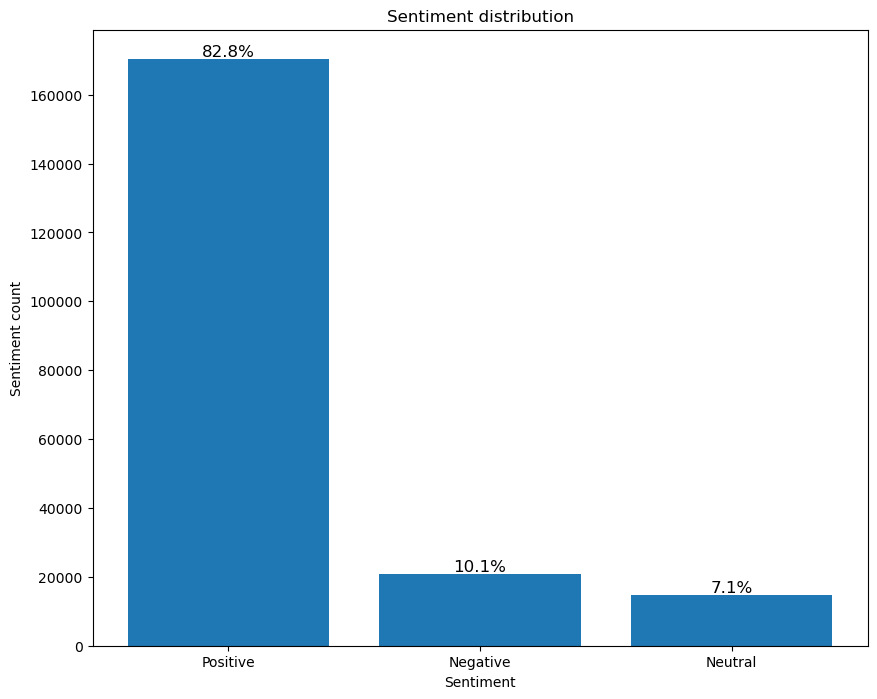

In [23]:
 #sentiment class distribution
sentiment = data['Sentiment'].value_counts().index.tolist()
sentiment_values = data['Sentiment'].value_counts().values.tolist()

# Calculate total percentages
total = sum(sentiment_values)
percentages = [value / total * 100 for value in sentiment_values]

# Plotting
plt.figure(figsize=(10,8))
bars = plt.bar(sentiment, sentiment_values)
plt.xlabel('Sentiment')
plt.ylabel('Sentiment count')
plt.title('Sentiment distribution')

# Add percentage labels on top of bars
for bar, percent in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/ 2.0, height, f'{percent:.1f}%',
             ha='center', va='bottom', fontsize=12)

plt.show()

82.8% of the customers gave positive sentiments, 10.1% negative sentiments and 7.1% gave neutral sentiments.

In [24]:
#top 20 brands
data['brand_name'].value_counts().head(20)

brand_name
CLINIQUE               18079
First Aid Beauty       13550
fresh                  12663
LANEIGE                12659
Youth To The People    11615
Tatcha                 10905
Origins                10584
Peter Thomas Roth      10481
Summer Fridays          8070
Murad                   6977
Estée Lauder            6879
OLEHENRIKSEN            6559
Drunk Elephant          5936
KORRES                  4895
Glow Recipe             3692
Dr. Jart+               3525
Biossance               3024
Dermalogica             3008
Farmacy                 2998
SEPHORA COLLECTION      2471
Name: count, dtype: int64

The bar chart above shows the top 20 brands with `CLINIQUE` at the top meaning it is the most used.

In [25]:
#skin tone value counts
data['skin_tone'].value_counts()

skin_tone
light          92411
fair           36512
lightMedium    33202
medium         11753
mediumTan      10747
fairLight       9590
tan             5904
deep            3711
rich            1014
porcelain        399
olive            345
dark             114
notSureST         14
ebony              2
Name: count, dtype: int64

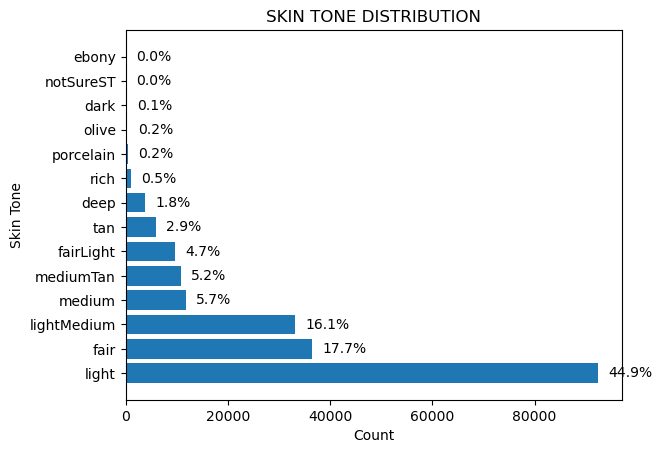

In [26]:
skin_tones = data['skin_tone'].value_counts().index.tolist()
skin_tone_values = data['skin_tone'].value_counts().values.tolist()

plt.barh(skin_tones, skin_tone_values)

# Add data labels for percentage at the end of the bar
total_count = sum(skin_tone_values)
for i, value in enumerate(skin_tone_values):
    percentage = (value / total_count) * 100
    plt.text(value + total_count * 0.01, i, f'{percentage:.1f}%', va='center', fontsize=10)

plt.xlabel('Count')
plt.ylabel('Skin Tone')
plt.title('SKIN TONE DISTRIBUTION');

44.9% of the people that are a majority of the customers have light and the least at 0.5% have a rich skintone

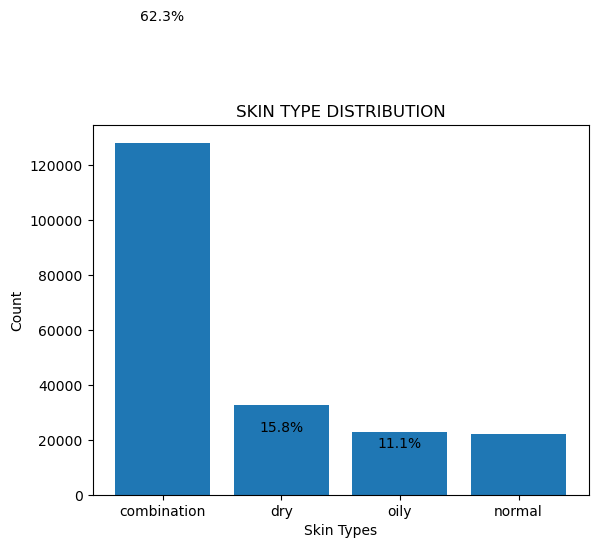

In [27]:
skin_types = data['skin_type'].value_counts().index.tolist()
skin_type_values = data['skin_type'].value_counts().values.tolist()

# Calculate percentages
total = sum(skin_type_values)
percentages = [value / total * 100 for value in skin_type_values]

plt.bar(skin_types, skin_type_values)
plt.xlabel('Skin Types')
plt.ylabel('Count')
plt.title('SKIN TYPE DISTRIBUTION');

# Add percentage labels on top of bars
for bar, percent in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0,
             height + max(skin_type_values) * 0.01,
             f'{percent:.1f}%',
             ha='center', va='bottom', fontsize=10)

62.3% of the customers have a combination of oily and dry skin and the least at 10.8% have normal skin type.

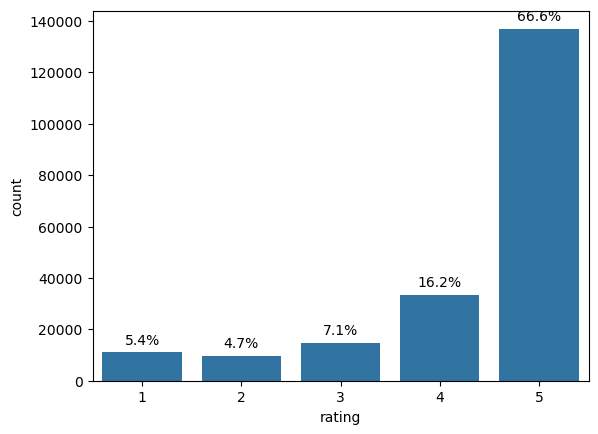

In [28]:
#rating distribution
ax = sns.countplot(data=data, x='rating');

total = len(data['rating'])

for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.text(p.get_x() + p.get_width() / 2,
            height + 0.01 * total,
            f'{percentage:.1f}%',
            ha='center', va='bottom', fontsize=10)


The rating ranges from 1-5, with 1 being the least and 5 the greatest. The graph 66.6% of the products are highly rated, which means the customers find the quality to be good.

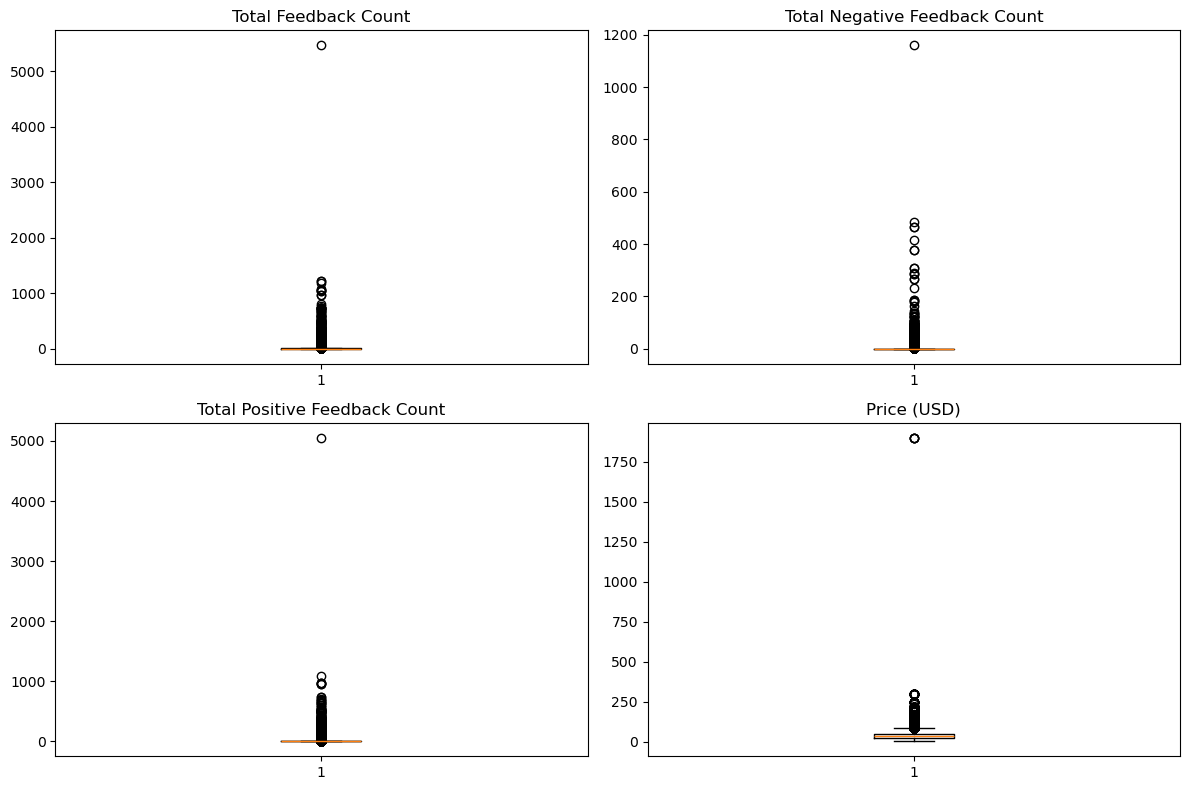

In [29]:
# Create box plots to visualize outliers
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.boxplot(data['total_feedback_count'])
plt.title('Total Feedback Count')

plt.subplot(2, 2, 2)
plt.boxplot(data['total_neg_feedback_count'])
plt.title('Total Negative Feedback Count')

plt.subplot(2, 2, 3)
plt.boxplot(data['total_pos_feedback_count'])
plt.title('Total Positive Feedback Count')

plt.subplot(2, 2, 4)
plt.boxplot(data['price_usd'])
plt.title('Price (USD)')

plt.tight_layout()
plt.show()

# Cap extreme values using the 95th percentile as the upper bound
for col in ['total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd']:
    upper_bound = data[col].quantile(0.95)
    data[col] = data[col].clip(upper=upper_bound)

Using the above box plots, we visualize outliers for `Total feedback`, `Negative feedback`, `Positive feedback`, `Price in USD`. We used the 95th percentile as the upper bound where this gets the value below which 95% of the data lies to cap the most extreme values. This reduces the effect caused by extreme outliers without removing the data and makes the visualizations and models more stable.

### 3.2 Bivariate Analysis

Text(0.5, 1.0, 'Skin Type vs Total Feedback Count')

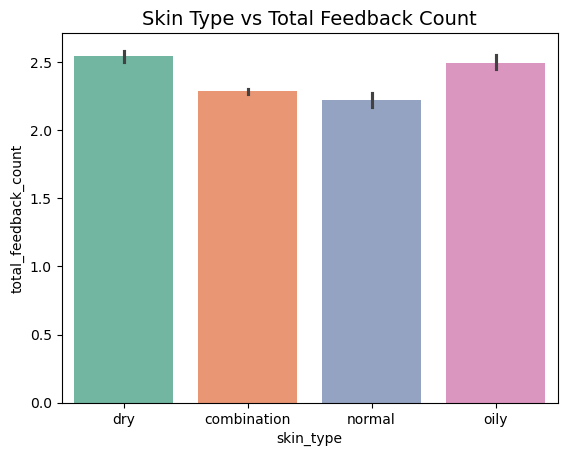

In [40]:
#skin type vs total feedback count
ax= sns.barplot(data=data, x='skin_type', y='total_feedback_count', palette='Set2');
plt.title("Skin Type vs Total Feedback Count", fontsize=14)

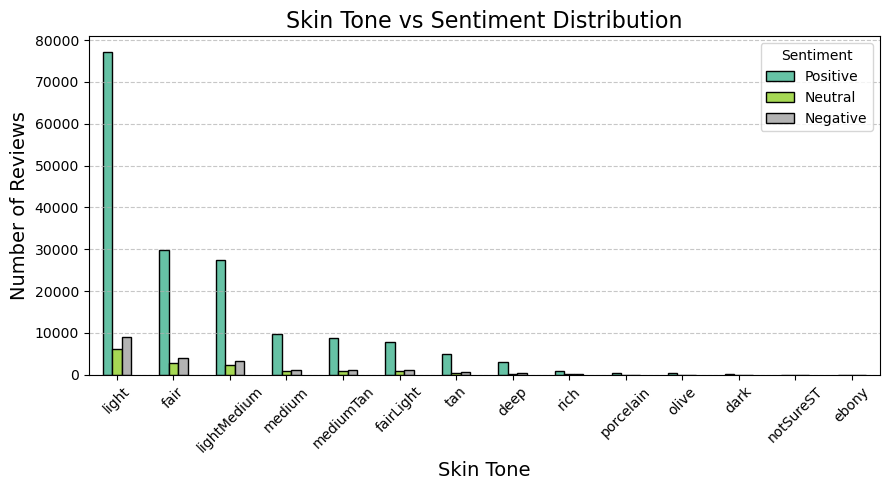

In [31]:
distribution = data.groupby(['skin_tone', 'Sentiment']).size().reset_index(name='Count')
pivot_distribution = distribution.pivot(index='skin_tone', columns='Sentiment', values='Count').fillna(0)

pivot_distribution['Total'] = pivot_distribution.sum(axis=1)
pivot_distribution = pivot_distribution.sort_values('Total', ascending=False)

pivot_distribution[['Positive', 'Neutral', 'Negative']].plot(
    kind='bar', figsize=(9, 5), colormap='Set2', edgecolor='black',
)

plt.title('Skin Tone vs Sentiment Distribution', fontsize=16)
plt.xlabel('Skin Tone', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

We see that the majority of evaluations are from individuals with light and fair skin tones, with light skin tones dominating considerably. Positive sentiments are strongest across all skin tones, particularly among the light, fair, and light/medium groups. Meanwhile, neutral and negative sentiments are significantly lower across all skin tones.

There's a fair distribution of skin types, from reviewers.

In [32]:
top_brands_expe = data.groupby(['brand_name'])['price_usd'].agg(['mean']).sort_values(by='mean', ascending=False)
top_brands_expe

,mean
brand_name,
Shani Darden Skin Care,80.000000
PROVEN Skincare,80.000000
MACRENE actives,80.000000
La Mer,80.000000
GUERLAIN,80.000000
...,...
Mario Badescu,15.355422
Skin Laundry,12.900000
The INKEY List,10.942626


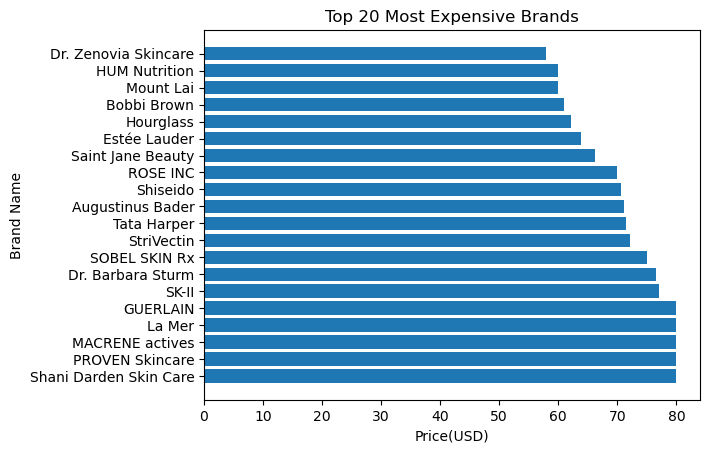

In [33]:
top_20_brands = top_brands_expe.head(20).index.tolist()
top_20_prices = top_brands_expe.head(20).values.flatten().tolist()

plt.barh(top_20_brands, top_20_prices)
plt.xlabel('Price(USD)')
plt.ylabel('Brand Name')
plt.title('Top 20 Most Expensive Brands');

Shan Darden, Proven skincare, Macrene actives , Guerlain, and La Mer are the most expensive products


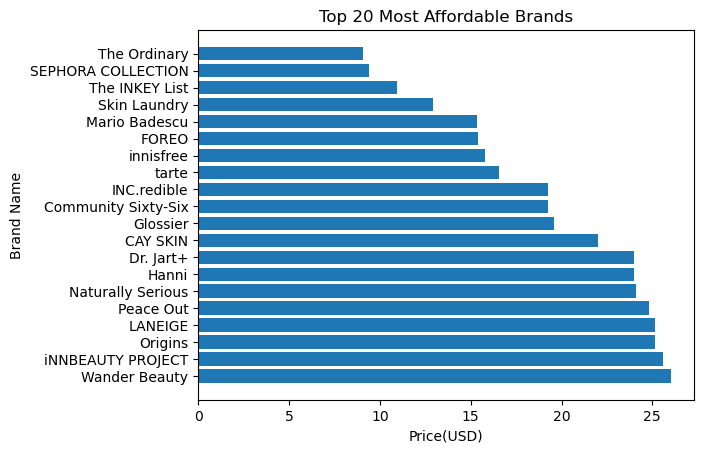

In [34]:
bottom_20 = top_brands_expe.tail(20).index.tolist()
bottom_20_prices = top_brands_expe.tail(20).values.flatten().tolist()

plt.barh(bottom_20, bottom_20_prices)
plt.xlabel('Price(USD)')
plt.ylabel('Brand Name')
plt.title('Top 20 Most Affordable Brands');

A factor of a product being can be it's affordability. Case in point, 'Laneige', 'Sephora Collection', which feature in top popular brands and most affordable brands.


### 3.3 Multivariate Analysis

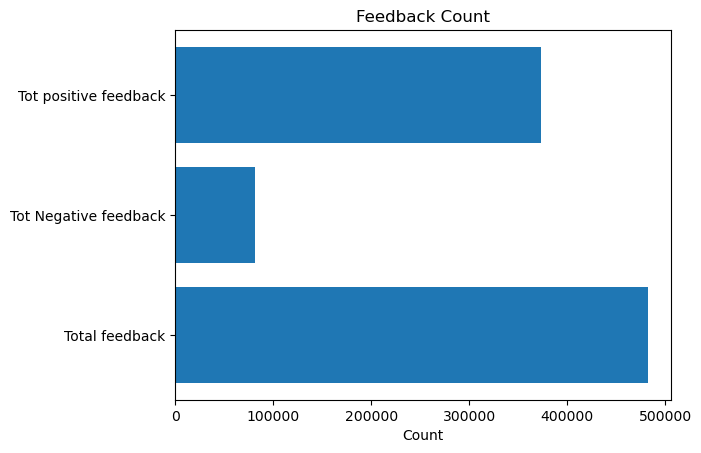

In [38]:
#feedback counts
tot_feedback = data['total_feedback_count'].sum()
tot_neg_feedback = data['total_neg_feedback_count'].sum()
tot_pos_feedback = data['total_pos_feedback_count'].sum()

feedback = ['Total feedback', 'Tot Negative feedback', 'Tot positive feedback']
total_feedbacks = [tot_feedback, tot_neg_feedback, tot_pos_feedback]

bars = plt.barh(feedback, total_feedbacks)
plt.xlabel('Count')
plt.title('Feedback Count');

We can see that customer sentiments are predominantly positive with estimated `90% positive feedback` and `10% negative feedback` . This shows a generally satisfied customer base. Even though positive feedback is high it is also worth to explore further into the negative feedback as well to uncover what the issue could be.

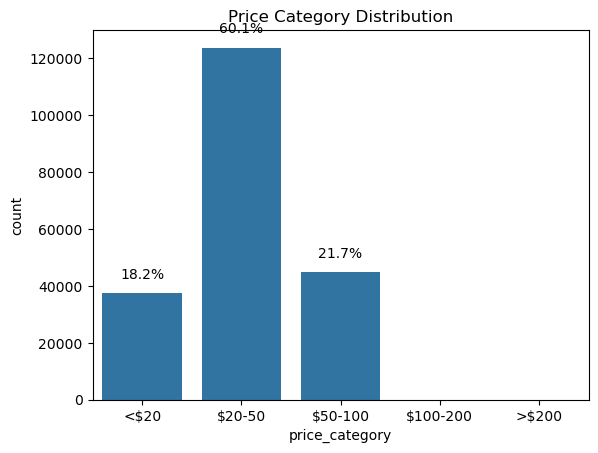

In [36]:
data['price_category'] = pd.cut(data['price_usd'],
                              bins=[0, 20, 50, 100, 200, 500],
                              labels=['<$20', '$20-50', '$50-100', '$100-200', '>$200'])
ax = sns.countplot(x='price_category', data=data)

#Calculate percentages
total_count = len(data)
for p in ax.patches:
    height = p.get_height()
    x_pos = p.get_x() + p.get_width() / 2
    percentage = (height / total_count) * 100
    ax.text(x_pos, height + 0.02 * total_count,
            f'{percentage:.1f}%',
            ha='center', va='bottom', fontsize=10)

plt.title('Price Category Distribution');

60.1% of the products range between 20-50 dollars. This shows a big percentage of products are affordable.

In [37]:
#correlation
data.corr()

ValueError: could not convert string to float: 'I use this with the Nudestix “Citrus Clean Balm & Make-Up Melt“ to double cleanse and it has completely changed my skin (for the better). The make-up melt is oil based and removes all of your makeup super easily. I follow-up with this water based cleanser, and I also use this just by itself when I’m not wearing make-up. It leaves the skin gently cleansed, but without stripping the skin. 10/10 recommend combining with the make-up melt. It’s perfection!'

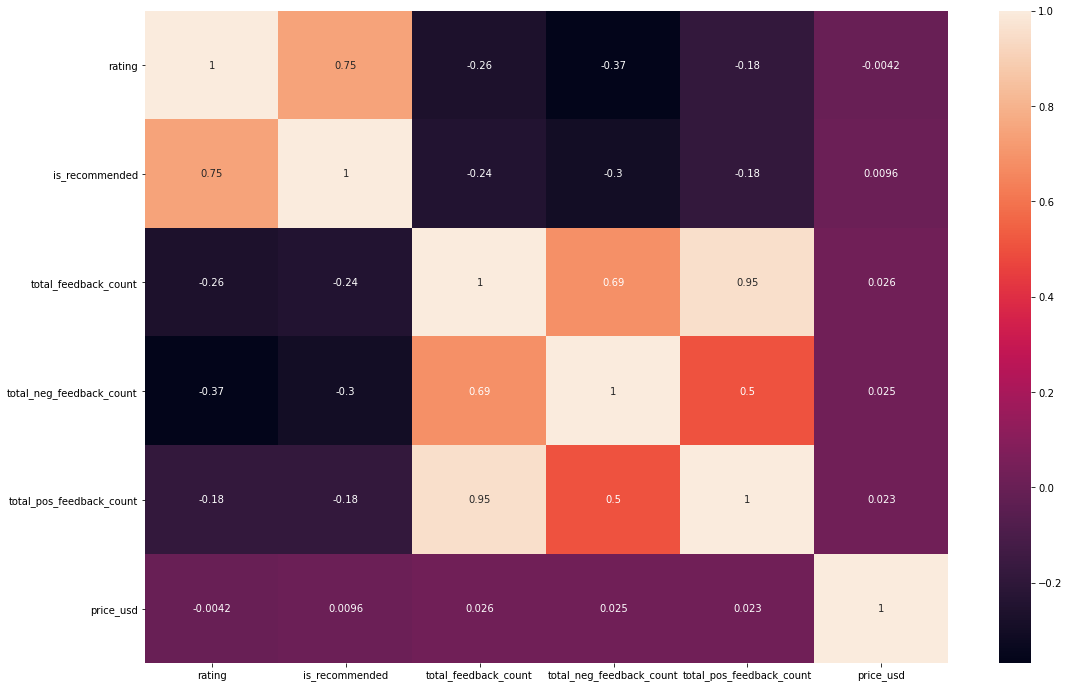

In [ ]:
#heat map of correlation
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(), annot=True)
plt.show()

There's a fair high positive correlation between `is_recommended` and `rating` suggesting that if a product is highly rated, it will be recommended by the customer.
It is surprising to see a negative correlation between positive feedback and rating

## 4. FEATURE ENGINEERING

### Term Frequency–Inverse Document Frequency

To convert our text into a format that machine learning models can process, we transform the cleaned review text into numerical features through vectorization

In [ ]:
tfidf = TfidfVectorizer(max_features=500, stop_words = 'english')

#fit and transform
tfidf_matrix = tfidf.fit_transform(data['final clean text'])

#convert into a dataframe then add a prefix
df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"tfidf_{word}"for word in tfidf.get_feature_names_out()])

#merge with original data
data = data.reset_index(drop=True)
data = pd.concat([data, df], axis=1)

In [ ]:
tfidf_matrix.shape

(205718, 500)

### WordCloud for most frequent words
Perform word cloud to see the most frequent words in our reviews

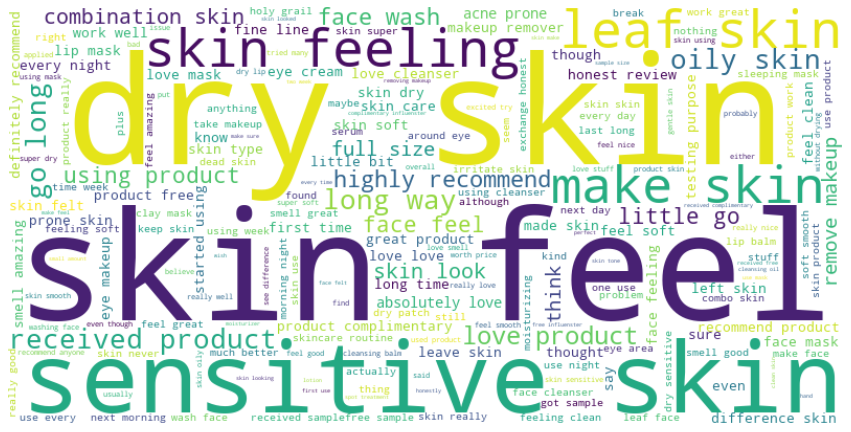

In [ ]:
all_text = " ".join(data['final clean text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

We create a new column `sentiment` in order to classify our ratings into positive, negative and neutral.

Positive sentiments dominate the data, as seen from the previous graph of rating distribution.
We'll now create new dataframes according to sentiments so that we can use them to create word clouds for those sentiments.

In [ ]:
#create new dataframes according to sentiments
positive = data[data['Sentiment'] == 'Positive']
negative = data[data['Sentiment'] == 'Negative']
neutral = data[data['Sentiment'] == 'Neutral']

We'll use `review_title` column to explore the word clouds for those sentiments.

### WordCloud for positive sentiments

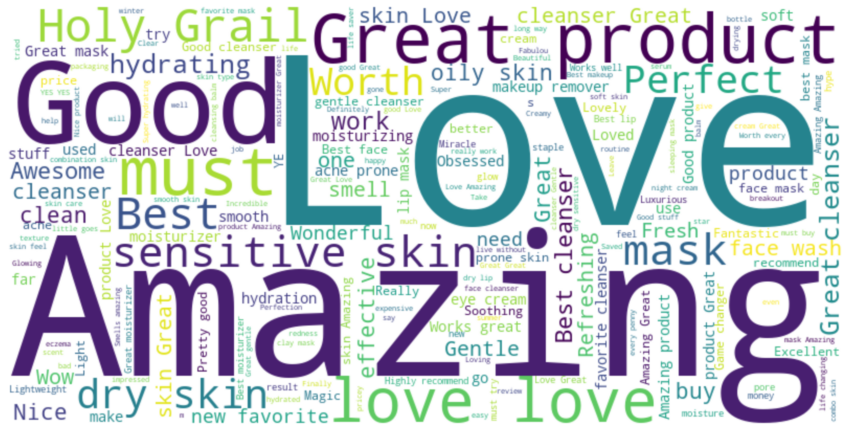

In [ ]:
#word cloud for positive sentiments

#ensuring that review title is string
positive['review_title'] = positive['review_title'].astype(str)
pos_text = " ".join(title for title in positive.review_title)

pos_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
plt.figure(figsize=(15,10))
plt.imshow(pos_wordcloud, interpolation='bicubic')
plt.axis('off')
plt.show();

### WordCloud for negative sentiments
Explore negative sentiments

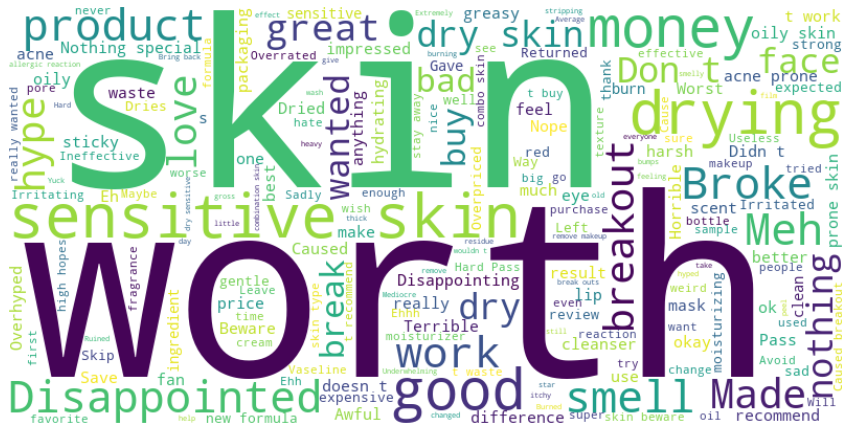

In [ ]:
#word cloud for negative sentiments

#ensuring that review title is string
negative['review_title'] = negative['review_title'].astype(str)

#join all texts in review title to one string
neg_text = " ".join(title for title in negative.review_title)

#create word cloud
neg_wordcloud = WordCloud(width=800, height=400,background_color='white').generate(neg_text)
plt.figure(figsize=(15,10))
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

### WordCloud for neutral sentiment
Explore neutral sentiments

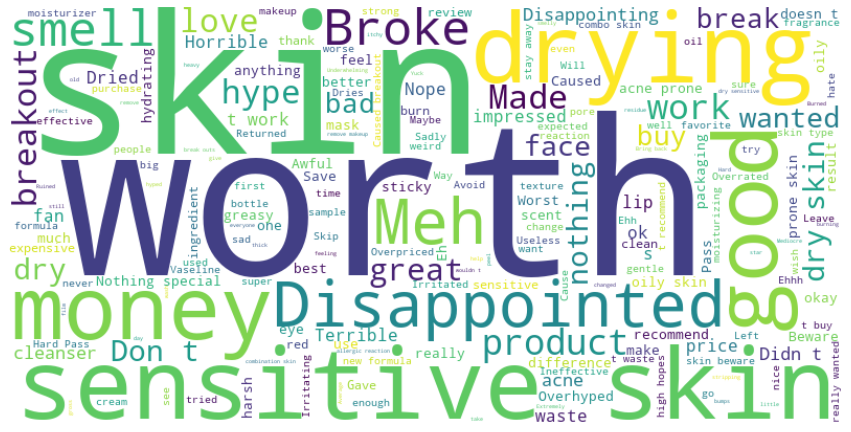

In [ ]:
#word cloud for neutral sentiments

#ensuring that review title is string
neutral['review_title'] = neutral['review_title'].astype(str)

#join all texts in review title to one string
neut_text = " ".join(title for title in negative.review_title)

#create word cloud
neut_wordcloud = WordCloud(width=800, height=400,background_color='white').generate(neut_text)
plt.figure(figsize=(15,10))
plt.imshow(neut_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

### Bigram Analysis
We'll now perform a bigram analysis to see which words appear together frequently

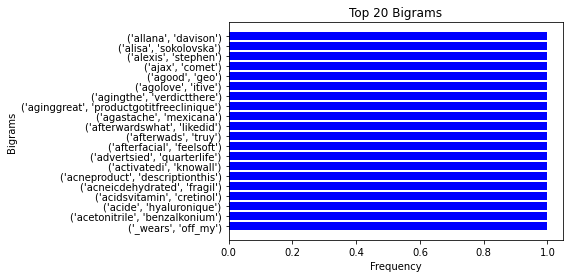

In [ ]:
#bigram analysis

# Flatten list of lists
all_words = [word for sublist in data['Lemmatized text'] for word in sublist]

#find bigrams
bigram_finder = BigramCollocationFinder.from_words(all_words)
bigram_measures = BigramAssocMeasures()

#plot bigrams
top_20_bigrams = bigram_finder.nbest(bigram_measures.pmi, 20)
bigram_frequencies = [bigram_finder.ngram_fd[bigram] for bigram in top_20_bigrams]
bigram_labels = [str(bigram) for bigram in top_20_bigrams] # Convert bigrams to strings
plt.barh(bigram_labels, bigram_frequencies, color='blue') # Use string labels
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 20 Bigrams');

## 5. MODELLING

We will start with defining our target and features, train and test split, then we balance the training set.

### 5.1 Baseline Model

In [ ]:
# Logistic regression
# Define features and label
features = ['final clean text', 'skin_type', 'skin_tone', 'price_usd', 'rating',
            'total_feedback_count', 'total_pos_feedback_count', 'total_neg_feedback_count']
target = 'is_recommended'

X = data[features]
y = data[target]

# Define preprocessing
text_pipeline = make_pipeline(
    TfidfVectorizer(max_features=500, stop_words='english')
)

categorical_features = ['skin_type', 'skin_tone']
numerical_features = ['price_usd', 'rating', 'total_feedback_count', 'total_pos_feedback_count', 'total_neg_feedback_count']

preprocessor = ColumnTransformer(transformers=[
    ('text', text_pipeline, 'final clean text'),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Fit the preprocessor on training data, transform train and test
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Apply SMOTE to transformed data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred = model.predict(X_test_transformed)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.67      0.94      0.78      5004
         1.0       0.99      0.94      0.96     36140

    accuracy                           0.94     41144
   macro avg       0.83      0.94      0.87     41144
weighted avg       0.95      0.94      0.94     41144



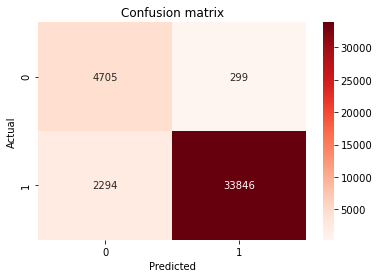

In [ ]:
#plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

### 5.2 LinearSVC

In [ ]:
# Preprocess training and test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Apply SMOTE to numeric-transformed data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

# Build the pipeline (only classifier, since data is already preprocessed)
pipeline_svc = Pipeline(steps=[
    ('classifier', LinearSVC())
])

# Parameter grid for LinearSVC
param_grid_svc = {
    'classifier__C': [0.1, 1.0, 10], 
    'classifier__max_iter': [1000, 2000]
}

# Grid search for model tuning
grid_svc = GridSearchCV(pipeline_svc, param_grid=param_grid_svc, cv=3, scoring='accuracy', n_jobs=-1)
grid_svc.fit(X_train_resampled, y_train_resampled)

# Results
print("Best LinearSVC Params:", grid_svc.best_params_)
print("Best Accuracy:", grid_svc.best_score_)

# Prediction and Evaluation
y_pred_svc = grid_svc.best_estimator_.predict(X_test_transformed)
print("LinearSVC Results:")
print(classification_report(y_test, y_pred_svc))


Best LinearSVC Params: {'classifier__C': 0.1, 'classifier__max_iter': 1000}
Best Accuracy: 0.9492525609109491
LinearSVC Results:
              precision    recall  f1-score   support

         0.0       0.66      0.94      0.78      5004
         1.0       0.99      0.93      0.96     36140

    accuracy                           0.93     41144
   macro avg       0.83      0.94      0.87     41144
weighted avg       0.95      0.93      0.94     41144



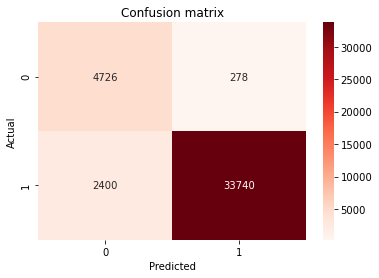

In [ ]:
#plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

### 5.3 Random Forest

In [ ]:
# Preprocess training and test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Apply SMOTE to numeric-transformed data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

pipeline_rf = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42))
])

# Parameter grid for RandomForest
param_grid_rf = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Grid search for model tuning
grid_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_resampled, y_train_resampled)

# Results
print("Best Random Forest Params:", grid_rf.best_params_)
print("Best Accuracy:", grid_rf.best_score_)

# Prediction and Evaluation
y_pred_rf = grid_rf.best_estimator_.predict(X_test_transformed)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


Best Random Forest Params: {'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best Accuracy: 0.9685457181756086
Random Forest Results:
              precision    recall  f1-score   support

         0.0       0.72      0.95      0.82      5004
         1.0       0.99      0.95      0.97     36140

    accuracy                           0.95     41144
   macro avg       0.86      0.95      0.89     41144
weighted avg       0.96      0.95      0.95     41144



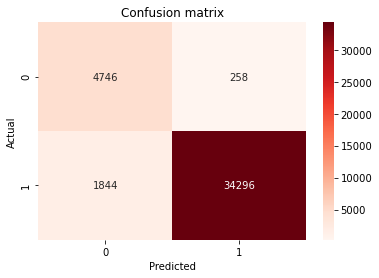

In [ ]:
#plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

### 5.4 XGBOOST

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

xgb_clf = xgb.XGBClassifier(
    subsample=1.0,
    reg_lambda=0.5,
    reg_alpha=0,
    n_estimators=100,
    max_depth=8,
    learning_rate=0.2,
    gamma=0,
    colsample_bytree=1.0,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_clf.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb_clf.predict(X_test_processed)
print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Results:
              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83      5004
         1.0       0.99      0.96      0.97     36140

    accuracy                           0.96     41144
   macro avg       0.88      0.93      0.90     41144
weighted avg       0.96      0.96      0.96     41144



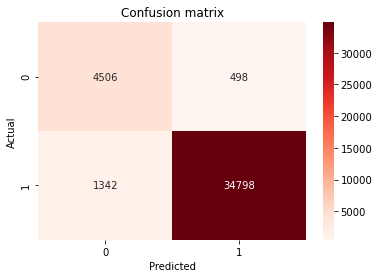

In [ ]:
#plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

## 6. MODEL EVALUATION

### ROC Curve for Model Comparison

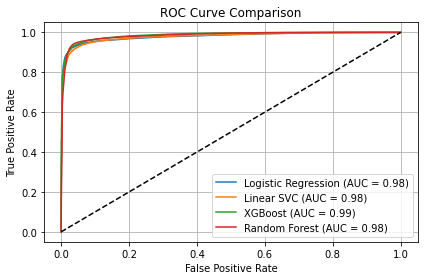

In [ ]:
text_col = 'final clean text'
numeric_cols = ['price_usd', 'rating', 'total_feedback_count', 
                'total_pos_feedback_count', 'total_neg_feedback_count']
categorical_cols = ['skin_type', 'skin_tone']

preprocessor = ColumnTransformer(transformers=[
    ('text', TfidfVectorizer(), text_col),
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Define models with proper preprocessing
models = {
    "Logistic Regression": Pipeline([
        ('preprocess', preprocessor),
        ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
    ]),
    "Linear SVC": Pipeline([
        ('preprocess', preprocessor),
        ('clf', LinearSVC(class_weight='balanced', max_iter=1000))
    ]),
    "XGBoost": Pipeline([
        ('preprocess', preprocessor),
        ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
    ]),
    "Random Forest": Pipeline([
        ('preprocess', preprocessor),
        ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
    ])
}

for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    if hasattr(pipeline.named_steps['clf'], "predict_proba"):
        y_scores = pipeline.predict_proba(X_test)[:, 1]
    else:
        y_scores = pipeline.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Logistic Regression
Logistic regression is a key model for multiclass classification problems.  Because of its simplicity, quickness, and interpretability, it serves as an excellent starting point for initial examination.

It helps to develop an initial baseline for detecting product recommendations based on TF-IDF features.  The model was simple to interpret. 

The model is 94% correct overally. Although it struggles with class 0, it perfroms well overally with a macro average F1-score of 0.87. The macro average F1-score shows the average F1-score when class imbalance is not considered. 

With an AUC Score of 0.98 this implies that the model did well in discriminating between recommended and non-recommended items, providing a fair evaluation between sensitivity and specificity.

### Linear SVC
Linear SVC is a type of support vector machine implemented for classification tasks when there needs a separation between the features and class labels by means of a linear decision boundary. Linear SVC performs well in high dimensional data, robust to overfitting, and good for classification.

93% of the time, the model gives correct predictions. Although it is skewed a little bit by dominance of class 1, it has a pretty good macro average F1-score of 87%


#### Random Forest Classifier
Random Forests are ensemble models which combine numerous decision trees to increase accuracy while minimizing overfitting.  They perform well with high-dimensional datasets such as TF-IDF vectors and can detect complicated feature relationships.

The model is 95% correct overally. With a macro average F1-score of 0.89, it perfroms slightly better than Linear SVC, and logistic regression.



#### XGBOOST
XGBoost is a high-performance gradient boosting technique popular for its speed, regularization, and predictive capability.  It excels at managing unbalanced datasets and nonlinear patterns.

XGBoost combined competitive performance with more flexibility.  The model's tweaking helped increase accuracy and recall, but it did not outperform Random Forest in AUC.  Nonetheless, it provided a robust alternative with outstanding learning ability.

The model correctly classifies 96% of the time. A macro average F1-score of 0.90 is the best so far. Checking on the AUC Score of 0.99 the model is seen to be the best performing

## 7. CONCLUSION AND RECOMMENDATIONS

### 7.1 Conclusions

From the above, the XG Boost model has the highest AUC of 0.99 thus has the best classification performance compared to the other models as it provides the most accurate trade-off between sensitivity (recall) and specificity.

The logistic regression, Linear SVC, and Random Forest also performs well, although XG boost performs the best in terms of accuracy and F1-score which is critical in distinguishing the classes.

Therefore, we'll use the XG Boost when deploying our model

### 7.2 Recommendations

We recommend that-

##### 1. Personalized product displays for online stores
Integrate real-time skin tone and sentiment analysis into the e-commerce platform to surace goods in the online and mobile catalogs, algorithmically re-order, highlight and promote preferred products more prominently. For instance, if consumers with darker skin tones rate a specific moisturizer higher than others, its automatically prioritized in the search results and category listings.


##### 2. Diversity, Equity, and Inclusion (DEI) transparency for companies
Publish quarterly "Skin-Tone Sentiment Scores" with Corporate Social Responsibility (CSR) reports to demonstrate commitment and development over time.


##### 3. Promotional targeting for online stores
Optimize promotions using sentiment analysis. This will entail scheduling flash sales or bundle offers based on lagging sentiments on products to stimulate purchase and sentiment scores by 30% over 60 days. For example, give a "Buy One, Get One" on goods with neutral feedback to encourage a test.


##### 4. Generate educational content for customers on the range and pricing of products
Promote budget conscious and preferenace based buying decisions. This will entail developing dynamic educational content such as interactive product guides and comparison charts that rank products by customer preference and pricing tier (low, medium, premium) to assist 80% of users to make informed purchases.


#### 5. Product use
Create product usage guides such as videos, quick read briefs and embed them on product pages in order to reduct product related support inquiries by 15% in 6 months.

### 7.3 Next Steps

#### 1. Creating a real-time sentiment insight dashboard for online stores.
This will generate reports based on real-time sentiments analysis, product monitoring, marketing insights and proactive customer service action.
